# Analyzing Time Series Data

### Practice in correcting time series data for seasonality.

#### Import Packages and Data.

In [1]:
import pandas as pd
import matplotlib
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = [12.0, 8.0]

In [2]:
data_set = pd.read_excel('MinDailyTemps.xlsx')
data_set.head(10)

,Date,Temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8
5,1981-01-06,15.8
6,1981-01-07,15.8
7,1981-01-08,17.4
8,1981-01-09,21.8
9,1981-01-10,20.0


#### Check for null values in data.

In [3]:
data_set.isnull().sum()

Date    0
Temp    0
dtype: int64

#### Check what types the data are.

In [4]:
data_set.dtypes

Date    datetime64[ns]
Temp           float64
dtype: object

#### Set the dates to be the index.

In [5]:
data_set = data_set.set_index('Date')

#### Peek at the head and tail of the data.

In [6]:
data_set.head().append(data_set.tail())

,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8
1990-12-27,14.0
1990-12-28,13.6
1990-12-29,13.5
1990-12-30,15.7


#### Plot the data to get an overview.

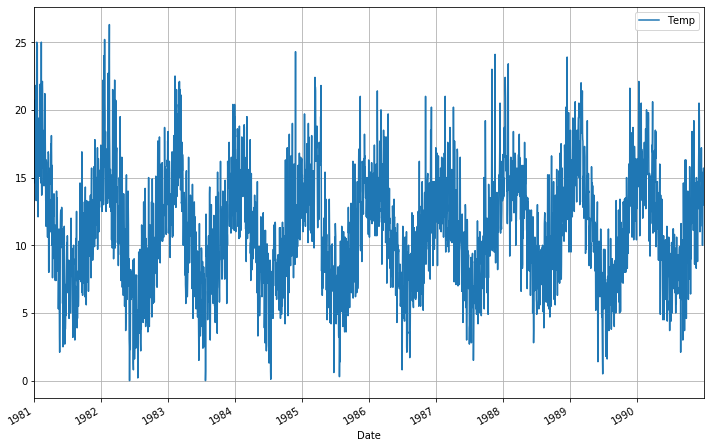

In [7]:
matplotlib.rcParams['figure.figsize'] = [12.0, 8.0]
data_set.plot(grid=True)

#### Let's take a closer look by observing the first two year's data.

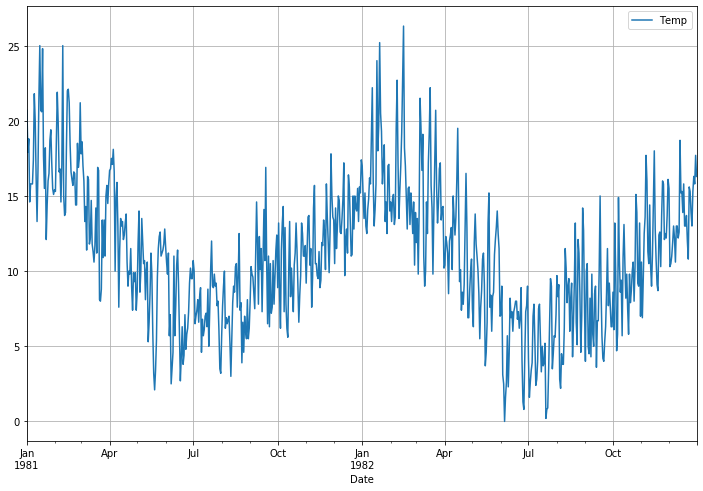

In [8]:
from datetime import datetime
start_date = datetime(1981, 1, 1)
end_date = datetime(1982, 12, 31)
data_set[(start_date <= data_set.index) & (data_set.index <= end_date)].plot(grid=True)

There are a couple of models to consider during the Decomposition of Time Series data.
1. Additive Model: This model is used when the variations around the trend do not vary with the level of the time series. Here the components of a time series are simply added together using the formula:

    y(t) = Level(t) + Trend(t) + Seasonality(t) + Noise(t)


2. Multiplicative Model: Is used if the trend is proportional to the level of the time series. Here the components of a time series are simply multiplied together using the formula:

    y(t) = Level(t) * Trend(t) * Seasonality(t) * Noise(t)
    
    
#### We will use the additive model.

In [9]:
data_set.head()

,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


- Trend: The increasing or decreasing value in the series. 
- Seasonality: The repeating short-term cycle in the series. 
- Noise: The random variation in the series.

In [10]:
decompfreq = 365 # for yearly seasonality

#### Import statsmodels which has a tsa (time series analysis) package as well as the sesonal_decompose() function.

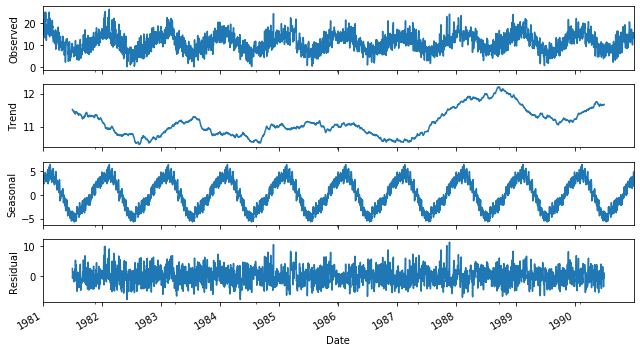

In [11]:
import statsmodels.api as sm
decomposition = sm.tsa.seasonal_decompose(data_set, 
                                          freq=decompfreq, 
                                          model = 'additive')
matplotlib.rcParams['figure.figsize'] = [9.0, 5.0]
fig = decomposition.plot()

#### Plot the trend alongside the observed time series. To do this, we will use Matplotlib's .YearLocator() function to set each year to begin from the month of January month=1 and month as the minor locator showing ticks for every 3 months (intervals=3). Then we plot our dataset (and gave it blue color) using the index of the dataframe as x-axis and the temperatures as the y-axis. 
#### We did the same for the trend observations which we plotted in red color.

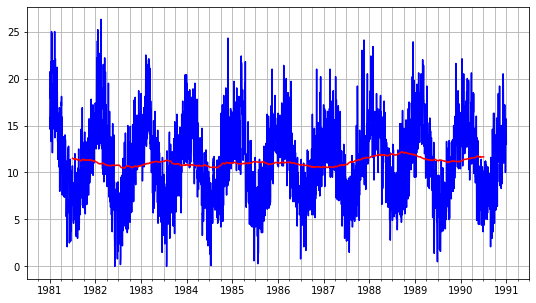

In [12]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
fig, ax = plt.subplots()
ax.grid(True)
year = mdates.YearLocator(month=1)
month = mdates.MonthLocator(interval=3)
year_format = mdates.DateFormatter('%Y')
month_format = mdates.DateFormatter('%m')
ax.xaxis.set_minor_locator(month)
ax.xaxis.grid(True, which = 'minor')
ax.xaxis.set_major_locator(year)
ax.xaxis.set_major_formatter(year_format)
plt.plot(data_set.index, data_set['Temp'], c='blue')
plt.plot(decomposition.trend.index, decomposition.trend, c='red')

#### When we plotted just the trend line, the graph seemed to indicate that the temperature was increasing slightly through the decade. But when comparing the trend line to the plot of temperatures, the rise seems insignificant. Of course, more than a decade and more than one location would be needed to truely make any conclusions.